###### 10M SMA SPY
Robert Sloan <br>
5/16/2019 <br>
replicating Al's AAII CIMI 10M SMA SPY Market timer <br>
SPY/10M Simple Moving Average (SMA) above 1.0% go long below 1.0% go short<br>
TO DO<br>
> calculate the 10M SMA from the end of last month <br>
> Can excel spreadsheet be formatted including column width? 


## load libraries

In [1]:
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
#All matplotlib plots appear inline in jupyter notebook
%matplotlib inline 

## using pandas-datareader to get Yahoo data
getting finacial data using panda-datareader https://github.com/pydata/pandas-datareader
<br>
First must install package at a command prompt in terminal:  > conda install -c anaconda pandas-datareader


In [2]:
from pandas_datareader import data

### Use datetime library for dates and times 

In [3]:
import datetime
currentDT = datetime.datetime.now()
#print(str(currentDT))
todays_date = str(currentDT.year) + "-" + str(currentDT.month) + "-"+  str(currentDT.day)
print(todays_date)

2019-5-16


### get adjusted close SPY data

Date
2010-01-04    94.130867
2010-01-05    94.380074
2010-01-06    94.446495
2010-01-07    94.845207
2010-01-08    95.160805
Name: Adj Close, dtype: float64

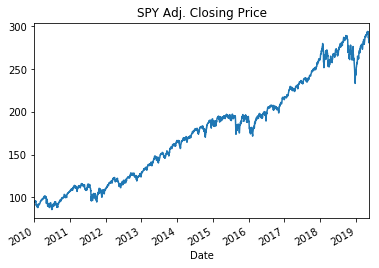

In [4]:
# Get the SPY adjusted close.
start_date = '2010-01-04'
end_date = todays_date

spy_data = data.DataReader("SPY", 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']


spy_data.plot(title='SPY Adj. Closing Price')# Convert the adjusted closing prices to cumulative returns.
spy_data.head()

### For missing data or starting on a non-market day

In [5]:
# Getting all weekdays between 01/01/2000 and end_date freq='B' chooses business days
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# reindex spy_data using all_weekdays as the new index.  Weekend data becomes NaN
spy_data = spy_data.reindex(all_weekdays)

# remove all 
# Reindexing will insert missing values (NaN) for the dates that were not present
# Fill the missing by replacing them
# with the last available price for each instrument.
spy_data = spy_data.fillna(method='ffill')

#print(all_weekdays)
print(spy_data.head(10))
spy_data.describe()

2010-01-04    94.130867
2010-01-05    94.380074
2010-01-06    94.446495
2010-01-07    94.845207
2010-01-08    95.160805
2010-01-11    95.293701
2010-01-12    94.404961
2010-01-13    95.202347
2010-01-14    95.459831
2010-01-15    94.388382
Freq: B, Name: Adj Close, dtype: float64


count    2444.000000
mean      175.553937
std        58.999438
min        85.641502
25%       118.489197
50%       178.519226
75%       217.061180
max       294.029999
Name: Adj Close, dtype: float64

### calculate and plot 10 month (210 day) simple moving average

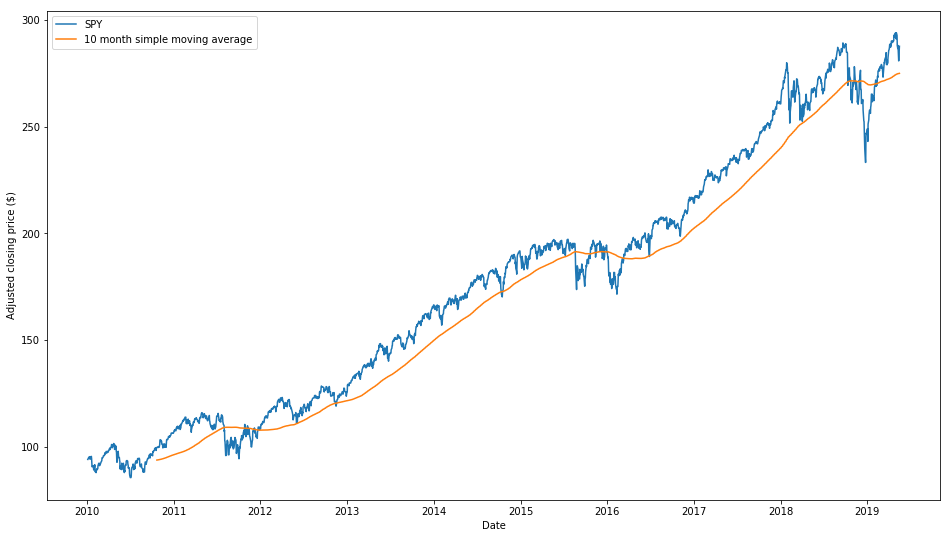

In [6]:
# Get the spy_data timeseries. This now returns a Pandas Series object indexed by date.

# Calculate the 10 month (210 days) moving averages of the closing prices
ten_m_sma = spy_data.rolling(window=210).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(spy_data.index, spy_data, label='SPY')
ax.plot(ten_m_sma.index, ten_m_sma, label='10 month simple moving average')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

### Determine to go 'Long' or 'Short' 

In [7]:
# Current Day 10M SMA SPY
current_spy = spy_data.loc[todays_date]
current_ten_m_sma = ten_m_sma[todays_date]
#sma_spy = "{0:0.01f}".format(current_spy/current_ten_m_sma)
sma_spy = round((current_spy/current_ten_m_sma),1)
print(sma_spy)
if (sma_spy>1):
    status = 'LONG'
else:
    status = 'SHORT'
print(status)
    

1.0
SHORT


### Create DataFrame with output

In [8]:
indicators = pd.DataFrame([{'Technical Indicator': '10M SMA SPY', 'Type': 'Market Timer', 'Status': status,
                          'Value': str(sma_spy), 'Comment': " SPY/10 month SMA; 1.0 is lower limit"}], 
                           columns=['Technical Indicator', 'Type', 'Status', 'Value', 'Comment'])
#indicators = pd.DataFrame([{'Technical Indicator': '10M SMA SPY', 'Type': 'Market Timer', 'Status': status}])

In [9]:
indicators

,Technical Indicator,Type,Status,Value,Comment
0,10M SMA SPY,Market Timer,SHORT,1.0,SPY/10 month SMA; 1.0 is lower limit


### Save as Excel file

In [10]:
writer = pd.ExcelWriter('indicator_sheet 10M SMA SPY.xlsx')
indicators.to_excel(writer,'Indicators', index=False)
writer.save()